In [5]:
!pip install opensmile
import opensmile
import pandas as pd
import numpy as np
import glob
import os
import pickle
import random
import librosa
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
    num_workers=24,
)
scaler = StandardScaler()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.0/996.0 kB 19.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 47.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 20.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 9.0.0
    Uninstalling pyarrow-9.0.0:
      Successfully uninstalled pyarrow-9.0.0
  Attemp

Load Data and Extract Feature

In [3]:
# barishal_data = glob.glob('/kaggle/input/ben10/ben10/16kHz_train_audio/train_barishal*.wav')
# df_barishal_data = smile.process_files(barishal_data)

# chittagong_data = glob.glob('/kaggle/input/ben10/ben10/16kHz_train_audio/train_chittagong*.wav')
# df_chittagong_data = smile.process_files(chittagong_data)

# habiganj_data = glob.glob('/kaggle/input/ben10/ben10/16kHz_train_audio/train_habiganj*.wav')
# df_habiganj_data = smile.process_files(habiganj_data)

# kishoreganj_data = glob.glob('/kaggle/input/ben10/ben10/16kHz_train_audio/train_kishoreganj*.wav')
# df_kishoreganj_data = smile.process_files(kishoreganj_data)

# narail_data = glob.glob('/kaggle/input/ben10/ben10/16kHz_train_audio/train_narail*.wav')
# df_narail_data = smile.process_files(narail_data)

# narsingdi_data = glob.glob('/kaggle/input/ben10/ben10/16kHz_train_audio/train_narsingdi*.wav')
# df_narsingdi_data = smile.process_files(narsingdi_data)

# rangpur_data = glob.glob('/kaggle/input/ben10/ben10/16kHz_train_audio/train_rangpur*.wav')
# df_rangpur_data = smile.process_files(rangpur_data)

# sandwip_data = glob.glob('/kaggle/input/ben10/ben10/16kHz_train_audio/train_sandwip*.wav')
# df_sandwip_data = smile.process_files(sandwip_data)

# sylhet_data = glob.glob('/kaggle/input/ben10/ben10/16kHz_train_audio/train_sylhet*.wav')
# df_sylhet_data = smile.process_files(sylhet_data)

# tangail_data = glob.glob('/kaggle/input/ben10/ben10/16kHz_train_audio/train_tangail*.wav')
# df_tangail_data = smile.process_files(tangail_data)

# macro_data = glob.glob('/kaggle/input/bengaliai-speech-wav-dataset-0/*/*.wav')[:10000]
# df_macro = smile.process_files(macro_data)

In [4]:
# df_barishal_data.to_csv('barishal_smile.csv')
# df_chittagong_data.to_csv('chittagong_smile.csv')
# df_habiganj_data.to_csv('habiganj_smile.csv')
# df_kishoreganj_data.to_csv('kishoreganj_smile.csv')
# df_narail_data.to_csv('narail_smile.csv')
# df_narsingdi_data.to_csv('narsingdi_smile.csv')
# df_rangpur_data.to_csv('rangpur_smile.csv')
# df_sandwip_data.to_csv('sandwip_smile.csv')
# df_sylhet_data.to_csv('sylhet_smile.csv')
# df_tangail_data.to_csv('tangail_smile.csv')
# df_macro.to_csv('macro_smile.csv')

In [6]:
df_barishal_data = pd.read_csv('/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/barishal_smile.csv') 
df_chittagong_data = pd.read_csv('/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/chittagong_smile.csv')
df_habiganj_data = pd.read_csv('/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/habiganj_smile.csv')
df_kishoreganj_data = pd.read_csv('/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/kishoreganj_smile.csv')
df_narail_data =pd.read_csv('/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/narail_smile.csv')
df_narsingdi_data =pd.read_csv('/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/narsingdi_smile.csv')
df_rangpur_data =pd.read_csv('/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/rangpur_smile.csv')
df_sandwip_data = pd.read_csv('/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/sandwip_smile.csv')
df_sylhet_data =pd.read_csv('/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/sylhet_smile.csv')
df_tangail_data =pd.read_csv('/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/tangail_smile.csv')
df_macro = pd.read_csv('/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/macro_smile.csv')

Concat All Data

In [7]:
vertical_concat = pd.concat([df_barishal_data, df_chittagong_data, df_habiganj_data,
       df_kishoreganj_data, df_narail_data, df_narsingdi_data,
       df_rangpur_data, df_sandwip_data, df_sylhet_data,
       df_tangail_data, df_macro], axis=0)
vertical_concat = vertical_concat.dropna().drop_duplicates()
print(vertical_concat.shape)

(24254, 91)


In [8]:
vertical_columns = vertical_concat.columns.to_list()
vertical_index = vertical_concat.index.tolist()

In [9]:
vertical_concat

,file,start,end,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,/kaggle/input/ben10/ben10/16kHz_train_audio/tr...,0 days,0 days 00:00:15.072000,27.464956,0.196470,22.359325,28.844463,30.869453,8.510128,323.693100,...,-0.017172,0.018848,0.028219,2.324037,3.133333,0.104043,0.095174,0.203333,0.231833,-41.316980
1,/kaggle/input/ben10/ben10/16kHz_train_audio/tr...,0 days,0 days 00:00:16.740000,35.574177,0.092565,33.373405,36.060360,37.900784,4.527378,75.547430,...,-0.000813,-0.000475,0.135568,2.630006,1.618705,0.266296,0.181805,0.370833,0.468668,-16.477654
2,/kaggle/input/ben10/ben10/16kHz_train_audio/tr...,0 days,0 days 00:00:16.700000,35.747883,0.102050,33.641327,35.458286,37.844140,4.202812,139.858030,...,0.058290,0.009848,0.240164,3.954464,2.704327,0.243556,0.196561,0.115366,0.151127,-17.972681
3,/kaggle/input/ben10/ben10/16kHz_train_audio/tr...,0 days,0 days 00:00:20.672000,34.444183,0.156570,30.574198,34.427345,37.366543,6.792345,89.106260,...,0.056769,0.018037,0.070883,4.840271,2.136960,0.354091,0.317793,0.098049,0.115910,-25.798506
4,/kaggle/input/ben10/ben10/16kHz_train_audio/tr...,0 days,0 days 00:00:20.192000,36.852863,0.096982,34.562940,37.037186,39.237022,4.674084,82.188545,...,0.065166,0.010157,0.314694,4.063429,2.334824,0.306808,0.375223,0.112381,0.129538,-13.810657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,/kaggle/input/bengaliai-speech/train_mp3s/9c1f...,0 days,0 days 00:00:03.060000,30.072163,0.283546,26.714554,27.387613,28.960072,2.245518,71.542430,...,0.046203,0.007751,0.586291,7.213115,2.675585,0.333750,0.353056,0.026000,0.008000,-15.888879
9996,/kaggle/input/bengaliai-speech/train_mp3s/42aa...,0 days,0 days 00:00:04.500000,33.009556,0.174983,30.729452,32.898537,38.003334,7.273882,28.129255,...,0.048077,-0.001099,0.076059,2.449889,1.351351,0.196667,0.179969,0.622000,0.851338,-19.801067
9997,/kaggle/input/bengaliai-speech/train_mp3s/e31b...,0 days,0 days 00:00:02.916000,31.499798,0.179129,28.763344,30.441467,31.917105,3.153761,114.631966,...,0.058914,0.014345,0.358047,5.172414,3.508772,0.130000,0.087636,0.142222,0.162329,-18.440287
9998,/kaggle/input/bengaliai-speech/train_mp3s/4b0a...,0 days,0 days 00:00:04.320000,37.003185,0.128249,32.445312,37.348354,39.041950,6.596638,120.256620,...,0.062355,0.000442,0.257380,3.944316,2.112676,0.225556,0.109556,0.182727,0.205430,-18.647408


In [10]:
# Load GENEVA feature set .pkl file
domains = []
for f in vertical_concat['file']:
    filename = f
    domain_name = filename.split("/")[-3]
    if domain_name == 'ben10smile-bengali-ai-reg-ben-asr-smile-features':
        domain_name = 'OOD_Speech'
    domains.append(domain_name)
#domains

In [11]:
domains = []
for f in vertical_concat['file']:
    temp = f.split('/')[-1].split(' ')[0][6:]
    if '.mp3' in temp:
        domains.append('OOD_Speech')
    else:
        domains.append(temp)

In [12]:
domains[-1]

'OOD_Speech'

In [13]:
vertical_concat['domain'] = domains

df_normalized =  pd.DataFrame(scaler.fit_transform(vertical_concat[vertical_columns].iloc[:,3:-2]), columns=vertical_columns[3:-2],)
df_normalized

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength
0,-1.038747,0.667148,-1.432898,-0.664147,-0.731340,0.672308,0.650190,0.054589,0.575556,0.269685,...,-1.483384,1.691507,-1.515084,0.943702,-0.754563,-1.031672,0.852972,-0.975372,-0.978823,-0.026319
1,0.585170,-0.737934,0.745654,0.712412,0.425425,-0.284373,-0.680534,-0.781515,0.251116,1.162240,...,-1.557480,1.410215,-0.994225,-0.385013,-0.354604,-0.789582,-0.895809,0.065544,-0.313930,0.569356
2,0.619955,-0.609664,0.798648,0.597556,0.416106,-0.362336,-0.335658,0.008672,0.596297,0.639348,...,1.780238,-0.712092,0.887542,0.324830,0.035098,0.258364,0.357644,-0.080346,-0.200675,-0.339156
3,0.358882,0.127588,0.191979,0.400886,0.337534,0.259686,-0.607823,-0.591961,-0.036446,0.235899,...,1.240996,-1.161254,0.839119,0.887927,-0.595607,0.959239,-0.297435,0.628778,0.729785,-0.400740
4,0.841233,-0.678195,0.980940,0.898759,0.645258,-0.249133,-0.644920,-0.675975,-0.215926,-0.217585,...,1.793460,-0.773739,1.106486,0.346093,0.312781,0.344581,-0.068983,0.325445,1.170560,-0.349771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24249,-0.516639,1.844660,-0.571447,-0.942067,-1.045463,-0.832490,-0.702012,-0.630490,0.427266,-0.427048,...,-1.067724,0.811809,0.502705,0.180608,1.324693,2.836696,0.324459,0.498284,1.000429,-0.656965
24250,0.071590,0.376584,0.222688,0.109238,0.442296,0.375354,-0.934822,-0.958558,-0.026076,-0.646615,...,0.718041,-1.583557,0.562373,-0.427921,-0.576322,-0.932096,-1.204494,-0.381155,-0.328018,1.462574
24251,-0.230748,0.432649,-0.166202,-0.359491,-0.558984,-0.614324,-0.470937,-0.655383,-0.409513,-0.368356,...,1.481914,-1.610325,0.907422,0.634048,0.474306,1.222039,1.286451,-0.808846,-1.036682,-0.243647
24252,0.871336,-0.255378,0.562080,0.958119,0.613165,0.212676,-0.440774,-0.583303,1.170685,1.471645,...,1.364615,-1.664774,1.016979,-0.321955,0.099244,0.250335,-0.325473,-0.195822,-0.868444,-0.099600


In [14]:
two_domains = []
for d in domains:
    if d == 'OOD_Speech':
        two_domains.append('OOD_Speech')
    else:
        two_domains.append('Regional Dialect')

In [15]:
# fit and transform the dataframe using the scaler object
#df_normalized = pd.DataFrame(scaler.fit_transform(vertical_concat[vertical_columns]), columns=vertical_columns,)
df_normalized["domains"] = two_domains# domains
#df_normalized["domains"] = df_normalized["domains"].apply(lambda x: "OpenSLR" if x.startswith("0") else x) 
#df_normalized["domains"] = df_normalized["domains"].apply(lambda x: domain_name_map[x] if x in domain_name_map.keys() else x)

#df_normalized = df_normalized[df_normalized['domains']! ='OOD_Speech']

labels = df_normalized["domains"].unique().tolist()
colors = plt.cm.get_cmap('tab20').colors
color_map = {label: colors[i % len(colors)] for i, label in enumerate(labels)}
color_map["MaCro train"] = (1,.25,.05)
domain_color = [color_map[x] for x in df_normalized['domains']]
print(labels)

['Regional Dialect', 'OOD_Speech']


/tmp/ipykernel_32/1353631429.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20').colors


In [ ]:
# plt.rcParams['figure.dpi'] = 600
# plt.rcParams['font.size'] = '12'
# # Perform t-SNE on the feature set
# tsne = TSNE(n_components=2, random_state=42, perplexity=80, metric="l2", n_iter=2000, early_exaggeration=50.0)
# tsne_results = tsne.fit_transform(df_normalized[vertical_columns[3:-2]])
# # Plot t-SNE results
# # plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s = .3, c=domain_color)
# # plt.axis('off')
# # plt.legend()
# # plt.show()

In [ ]:
# import seaborn as sns
# tsne_df   = pd.DataFrame(tsne_results)
# htw = tsne_df.to_numpy(copy = True)
# tsne_df['tsne_x'] = htw[:, 0]
# tsne_df['tsne_y'] = htw[:, 1]
# tsne_df.head()
# my_cmap = sns.color_palette(list(color_map.values()))
# plt.rcParams['figure.dpi'] = 600

# sns.scatterplot(
#       x       = "tsne_x",
#       y       = "tsne_y",
#       hue= df_normalized.domains.to_list(),
#       data    = tsne_df,
#       alpha   = 0.9,
#       s= 2,
#      # palette = my_cmap
#    )


# plt.legend(loc = 'best', ncol= 4, fontsize= 6, bbox_to_anchor=(1.1,0), frameon=False)
# plt.axis('off')

# plt.savefig('sushmitSNE2.png', bbox_inches='tight')

# #plt.show()


In [ ]:
# my_cmap = sns.color_palette(list(color_map.values()))
# my_cmap

In [ ]:
# print(df_normalized.shape)

In [ ]:
# df_normalized['domains'].value_counts()

In [ ]:
# rangpur = df_normalized[df_normalized["domains"] == "rangpur"]
# rangpur = rangpur.drop(columns=["domains"])
# rangpur = rangpur[:1321]
# print(rangpur.shape)
# rangpur_values = rangpur.values


In [16]:
OODSpeech = df_normalized[df_normalized["domains"] == "OOD_Speech"]
OODSpeech = OODSpeech.drop(columns=["domains"])
#OODSpeech = rangpur[:1321]
print(OODSpeech.shape)
OODSpeech_values = OODSpeech.values

regional = df_normalized[df_normalized["domains"] == "Regional Dialect"]
regional = regional.drop(columns=["domains"])
regional = regional#[:1321]
print(regional.shape)
regional_values = regional.values



(10000, 86)
(14254, 86)


In [17]:
# kishoreganj = df_normalized[df_normalized["domains"] == "kishoreganj"]
# kishoreganj = kishoreganj.drop(columns=["domains"])
# kishoreganj = kishoreganj[:1321]
# print(kishoreganj.shape)
# kishoreganj_values = kishoreganj.values


In [18]:
# narail = df_normalized[df_normalized["domains"] == "narail"]
# narail = narail.drop(columns=["domains"])
# narail = narail[:1321]
# print(narail.shape)
# narail_values = narail.values

In [19]:
# chittagong = df_normalized[df_normalized["domains"] == "chittagong"]
# chittagong = chittagong.drop(coluamns=["domains"])
# chittagong = chittagong[:1321]
# print(chittagong.shape)
# chittagong_values = chittagong.values

In [20]:
# narsingdi = df_normalized[df_normalized["domains"] == "narsingdi"]
# narsingdi = narsingdi.drop(columns=["domains"])
# narsingdi = narsingdi[:1321]
# print(narsingdi.shape)
# narsingdi_values = narsingdi.values

In [21]:
# from scipy.ndimage.filters import gaussian_filter
# from scipy.stats import entropy

# def kl(P,Q):
#     epsilon = 0.00001

#     # You may want to instead make copies to avoid changing the np arrays.
#     P = P+epsilon
#     Q = Q+epsilon
#     divergence = np.sum(P*np.log(P/Q))
#     return divergence
# num_bins = 88
# idx = list(range(88))
# cols_rangpur = []
# cols_chittagong = []
# cols_narail = []
# cols_kishoreganj =[]
# cols_narsingdi =[]
# kl_divs = []
# sigma = 1
# for i in idx:
#     _,bins = np.histogram(
#         np.concatenate([rangpur_values[:,i],chittagong_values[:,i], narail_values[:,i],kishoreganj_values[:,i],narsingdi_values[:,i]],axis=0),
#         num_bins
#     )
#     hist1,_ = np.histogram(rangpur_values[:,i],bins)
#     # print(hist)
#     cols_rangpur.append(hist1)

#     hist2,_ = np.histogram(chittagong_values[:,i],bins)
#     cols_chittagong.append(hist2)
    
    
#     hist3,_ = np.histogram( narail_values[:,i],bins)
#     cols_narail.append(hist3)
    
#     hist4,_ = np.histogram(kishoreganj_values[:,i],bins)
#     cols_kishoreganj.append(hist4)
    
#     hist5,_ = np.histogram(narsingdi_values[:,i],bins)
#     cols_narsingdi.append(hist5)
    
#     asmooth, bsmooth = (gaussian_filter(hist1, sigma),
#                         gaussian_filter(hist2, sigma),
#                        gaussian_filter(hist3, sigma),
#                        gaussian_filter(hist4, sigma),
#                        gaussian_filter(hist5, sigma))

# #     hist3,_ = np.histogram(asr_feature_values[:,i],bins)
# #     cols_asr.append(hist3)
#     # kl_div = kl(bsmooth, asmooth)
#     # # kl_div = entropy(hist1, hist2)
#     # kl_divs.append(kl_div)

# img_rangpur = np.vstack(cols_rangpur).T
# img_chittagong = np.vstack(cols_chittagong).T
# img_narail= np.vstack(cols_narail).T
# img_kishoreganj = np.vstack(cols_kishoreganj).T
# img_narsingdi = np.vstack(cols_narsingdi).T

# print(img_rangpur.shape)
# print(img_chittagong.shape)
# print(img_narail.shape)
# print(img_kishoreganj.shape)
# print(img_narsingdi.shape)

# # norm = [float(i)/sum(kl_divs) for i in kl_divs]
# # norm
# # plt.rcParams['figure.dpi'] = 600
# # plt.rcParams['font.size'] = '12'
# # plt.imshow(np.log(img_train+1))
# # # plt.title('Train set GENEVA features histograms')
# # plt.axis("off")
# # plt.savefig("train_geneva_hmap.png", dpi=600)

In [22]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.stats import entropy

def kl(P, Q):
    epsilon = 0.00001

    # You may want to instead make copies to avoid changing the np arrays.
    P = P + epsilon
    Q = Q + epsilon
    divergence = np.sum(P * np.log(P / Q))
    return divergence

num_bins = 85
idx = list(range(85))


cols_ood = []
cols_reg = []

# cols_rangpur = []
# cols_chittagong = []
# cols_narail = []
# cols_kishoreganj = []
# cols_narsingdi = []
kl_divs = []
sigma = 1

for i in idx:
    _, bins = np.histogram(
        np.concatenate([OODSpeech_values[:, i], regional_values[:, i]], axis=0),
        num_bins
    )
    hist1, _ = np.histogram(OODSpeech_values[:, i], bins)
    cols_ood.append(hist1)

    hist2, _ = np.histogram(regional_values[:, i], bins)
    cols_reg.append(hist2)

    asmooth = gaussian_filter(hist1, sigma)
    bsmooth = gaussian_filter(hist2, sigma)

    kl_div = kl(bsmooth, asmooth)
    kl_divs.append(kl_div)

img_ood = np.vstack(cols_ood).T
img_reg = np.vstack(cols_reg).T
# img_narail = np.vstack(cols_narail).T
# img_kishoreganj = np.vstack(cols_kishoreganj).T
# img_narsingdi = np.vstack(cols_narsingdi).T

# print(img_rangpur.shape)
# print(img_chittagong.shape)
# print(img_narail.shape)
# print(img_kishoreganj.shape)
# print(img_narsingdi.shape)

# Calculate the normalized KL divergence values
norm = [float(i) / sum(kl_divs) for i in kl_divs]
print(norm)


[0.01131521428789113, 0.012035252525326959, 0.012789747359336844, 0.01237628312928319, 0.013168598733822222, 0.01658298290960794, 0.009740050214849862, 0.01151430497176995, 0.008876840210358915, 0.008419665029479913, 0.012388814665368607, 0.018136236386318706, 0.016456452144028473, 0.011235869982830183, 0.016753564573258904, 0.02241654717002784, 0.023661089658790952, 0.01819655162088876, 0.023631409906269364, 0.01581230345802348, 0.021888531952124778, 0.012859011066944709, 0.010073677456605921, 0.007842271637730103, 0.011480878657173796, 0.007826976669215908, 0.009668141618016794, 0.007859495054435915, 0.011030842495265685, 0.007809977957232064, 0.013438677083898804, 0.009824030442965172, 0.02401443700945633, 0.011144584295604462, 0.012861627796311441, 0.007894224257804295, 0.010011942773609086, 0.00782855226128798, 0.013520081114843248, 0.007940453082564325, 0.008636597530777695, 0.008910803018732946, 0.008378770438880157, 0.010824033089470187, 0.00830755845328844, 0.00787566214486767

In [23]:
vertical_columns

['file',
 'start',
 'end',
 'F0semitoneFrom27.5Hz_sma3nz_amean',
 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
 'loudness_sma3_amean',
 'loudness_sma3_stddevNorm',
 'loudness_sma3_percentile20.0',
 'loudness_sma3_percentile50.0',
 'loudness_sma3_percentile80.0',
 'loudness_sma3_pctlrange0-2',
 'loudness_sma3_meanRisingSlope',
 'loudness_sma3_stddevRisingSlope',
 'loudness_sma3_meanFallingSlope',
 'loudness_sma3_stddevFallingSlope',
 'spectralFlux_sma3_amean',
 'spectralFlux_sma3_stddevNorm',
 'mfcc1_sma3_amean',
 'mfcc1_sma3_stddevNorm',
 'mfcc2_sma3_amean',
 'mfcc2_sma3_stddevNorm',
 'mfcc3_sma3_amean',
 'mfcc3

In [ ]:
# plt.rcParams['figure.dpi'] = 600
# plt.rcParams['font.size'] = '12'
# plt.imshow(np.log(img_ood+1))
# # plt.title('Train set GENEVA features histograms')
# plt.axis("off")
# plt.savefig("ood_geneva_map.png", dpi=600)



# plt.rcParams['figure.dpi'] = 600
# plt.rcParams['font.size'] = '12'
# plt.imshow(np.log(img_reg+1))
# # plt.title('Train set GENEVA features histograms')
# plt.axis("off")
# plt.savefig("reg_geneva_map.png", dpi=600)


In [24]:
vertical_columns = vertical_columns[3:-2]
color_map

{'Regional Dialect': (0.12156862745098039,
  0.4666666666666667,
  0.7058823529411765),
 'OOD_Speech': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'MaCro train': (1, 0.25, 0.05)}

In [28]:
## Run this cell to generate all hist plots
import matplotlib.pyplot as plt

# Define the color mapping
color_map = {
    'Ben-10': '#1f77b4',  # Blue
    'OOD-Speech': '#ff7f0e'  # Orange
}


# Loop through all indices in the dataset
for idx in range(OODSpeech_values.shape[1]):  # Assuming shape[1] gives the number of columns
    plt.figure(figsize=(5, 4))  # Create a new figure for each histogram
    
    # Plot histograms with custom colors
    plt.hist(regional_values[:, idx], bins, alpha=0.6, color=color_map['Ben-10'], label='Ben-10', density=True)
    plt.hist(OODSpeech_values[:, idx], bins, alpha=0.6, color=color_map['OOD-Speech'], label='OOD-Speech', density=True)
    
    
    # Set log scale and labels
    plt.yscale('log')
    plt.xlabel(vertical_columns[idx], fontsize=12)
    plt.ylabel("Density (Log)", fontsize=12)
    plt.legend()
    
    # Save figure with the corresponding column name
    filename = f"{vertical_columns[idx]}.png"
    # plt.show()
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.close()  # Close the figure to free memory



In [29]:
!zip -r smile_comp.zip /kaggle/working

updating: kaggle/working/ (stored 0%)
updating: kaggle/working/mfcc1_sma3_amean.png (deflated 21%)
updating: kaggle/working/F0semitoneFrom27.5Hz_sma3nz_amean.png (deflated 21%)
updating: kaggle/working/F3frequency_sma3nz_stddevNorm.png (deflated 21%)
updating: kaggle/working/F3amplitudeLogRelF0_sma3nz_stddevNorm.png (deflated 21%)
updating: kaggle/working/hammarbergIndexV_sma3nz_amean.png (deflated 21%)
updating: kaggle/working/F0semitoneFrom27.5Hz_sma3nz_percentile80.0.png (deflated 20%)
updating: kaggle/working/mfcc4_sma3_stddevNorm.png (deflated 22%)
updating: kaggle/working/MeanVoicedSegmentLengthSec.png (deflated 21%)
updating: kaggle/working/F2frequency_sma3nz_stddevNorm.png (deflated 21%)
updating: kaggle/working/slopeUV500-1500_sma3nz_amean.png (deflated 21%)
updating: kaggle/working/F1bandwidth_sma3nz_amean.png (deflated 22%)
updating: kaggle/working/mfcc3_sma3_amean.png (deflated 21%)
updating: kaggle/working/F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope.png (deflated 19%)
u

In [ ]:
target_idx =  [47, 54, 41, 55, 42]
num_rows = 2
num_cols = 3

# create figure and subplots
fig, axs = plt.subplots(num_rows, num_cols)

# for i in range(num_rows):
#     for j in range(num_cols):

for i in target_idx:
    print(vertical_columns[i])
    plt.hist(rangpur_values[:,i],bins,alpha=.5,label='rangpur');
    plt.hist(chittagong_values[:,i],bins,alpha=.5,label='chittagong');
    plt.hist(narail_values[:,i],bins,alpha=.5,label='narail');
    plt.hist(kishoreganj_values[:,i],bins,alpha=.5,label='kishoreganj');
    plt.hist(narsingdi_values[:,i],bins,alpha=.5,label='narsingdi');
    
    plt.yscale('log')
    plt.xlabel(vertical_columns[i])
    plt.legend()
    plt.axis("on")
    plt.savefig(f'{vertical_columns[i]}.pdf',dpi=300,transparent = True, bbox_inches = 'tight', pad_inches = 0)

In [29]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


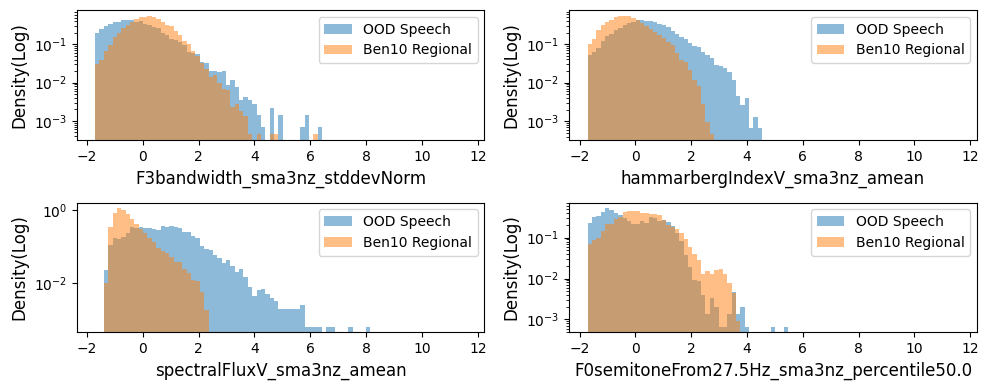

In [27]:
import matplotlib.pyplot as plt

# Define the target indices and number of rows and columns for subplots
target_idx = [55, 60, 66, 3, ] #, 41, 55, 42, 50] 62, 64 4, 5
num_rows = 2
num_cols = 2

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 4))

# Create histograms for each target index
for i, ax in enumerate(axs.ravel()):
    if i < len(target_idx):
        idx = target_idx[i]
        ax.hist(OODSpeech_values[:, idx], bins, alpha=0.5, label='OOD Speech',density=True)
        ax.hist(regional_values[:, idx], bins, alpha=0.5, label='Ben10 Regional',density=True)
        
        ax.set_yscale('log')
        ax.set_xlabel(vertical_columns[idx],fontsize=12)
        ax.set_ylabel("Density(Log)",fontsize=12)

        ax.legend()
       # ax.set_title(f'Index {idx}')
        ax.axis("on")

# Adjust layout and display the figure
plt.tight_layout()
plt.savefig("histograms.png", dpi=300, bbox_inches="tight")
plt.show()

#55, 58, 60, 62, 64, 66, 2, 3, 4, 5, 20, 

In [ ]:
import matplotlib.pyplot as plt

# Define the target indices and number of rows and columns for subplots
target_idx = [55, 60, 66, 3, ] 
num_rows = 2
num_cols = 2

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 4))

# Create histograms for each target index
for i, ax in enumerate(axs.ravel()):
    if i < len(target_idx):
        idx = target_idx[i]
        ax.hist(OODSpeech_values[:, idx], bins, alpha=0.5, label='OOD Speech',density=True)
        ax.hist(regional_values[:, idx], bins, alpha=0.5, label='Ben10 Regional',density=True)
        
        ax.set_yscale('log')
        ax.set_xlabel(vertical_columns[idx],fontsize=12)
        ax.set_ylabel("Density(Log)",fontsize=12)
#         ax.legend()
       # ax.set_title(f'Index {idx}')
        ax.axis("on")

# Adjust layout and display the figure
plt.tight_layout()
plt.savefig("histograms.png", dpi=300, bbox_inches="tight")
plt.show()

#55, 58, 60, 62, 64, 66, 2, 3, 4, 5, 20, 